## Problem Statement

- Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. 


- But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. 


- Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. 


- You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# code to display rows and columns

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [6]:
df = pd.read_excel("Data_Train.xlsx")

In [7]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


### Column Description

- TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.


- RESTAURANT_ID: A unique ID for each restaurant.


- CUISINES: The variety of cuisines that the restaurant offers.


- TIME: The open hours of the restaurant.


- CITY: The city in which the restaurant is located.


- LOCALITY: The locality of the restaurant.


- RATING: The average rating of the restaurant by customers.


- VOTES: The overall votes received by the restaurant.


- COST: The average cost of a two-person meal.

## Problem Type

Conclusions after understanding the data set:-

- 1) The target variable is COST	

- 2) The target variable is continuous in nature

- 3) Solving it as a Regression Problem

## Checking the data types

In [8]:
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

## Data types include:

- Object
- Int

### Lets check for duplicate values

In [9]:
df.duplicated().sum()

25

In [10]:
df = pd.DataFrame.drop_duplicates(df)

In [11]:
df.duplicated().sum()

0

### No more duplicated values

### Lets check for missing values

In [12]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

### There are a lot of missing values in data

<AxesSubplot:>

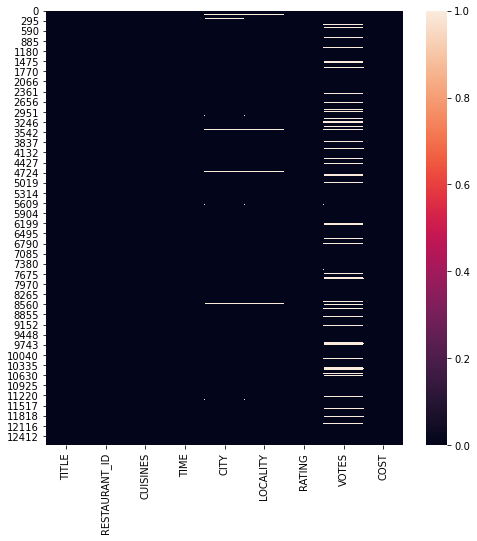

In [13]:
# Visualizing the missing values
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

### Data Shape

In [14]:
df.shape

(12665, 9)

In [15]:
df_test = pd.read_excel("Data_Test.xlsx")

In [16]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [17]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [18]:
df_test.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [19]:
df_test.duplicated().sum()

1

In [20]:
df_test = pd.DataFrame.drop_duplicates(df_test)

In [21]:
df_test.duplicated().sum()

0

In [22]:
###############################################################################################################################################

# chechking the features in the Datasets

###############################################################################################################################################


#Training Set

print("\nEDA on Training Set\n")
print("#"*30)
print("\nFeatures/Columns : \n", df.columns)
print("\n\nNumber of Features/Columns : ", len(df.columns))
print("\nNumber of Rows : ",len(df))
print("\n\nData Types :\n", df.dtypes)
print("\nContains NaN/Empty cells : ", df.isnull().values.any())
print("\nTotal empty cells by column :\n", df.isnull().sum(), "\n\n")


# Test Set
print("#"*30)
print("\nEDA on Test Set\n")
print("#"*30)
print("\nFeatures/Columns : \n",df_test.columns)
print("\n\nNumber of Features/Columns : ",len(df_test.columns))
print("\nNumber of Rows : ",len(df_test))
print("\n\nData Types :\n", df_test.dtypes)
print("\nContains NaN/Empty cells : ", df_test.isnull().values.any())
print("\nTotal empty cells by column :\n", df_test.isnull().sum())


EDA on Training Set

##############################

Features/Columns : 
 Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')


Number of Features/Columns :  9

Number of Rows :  12665


Data Types :
 TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

Contains NaN/Empty cells :  True

Total empty cells by column :
 TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64 


##############################

EDA on Test Set

##############################

Features/Columns : 
 Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dt

In [23]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300



## Exploratory Data Analysis

- In the below code blocks, we will perform an analysis on the given data.

- Checking the features in the Datasets

- Data Analysis :
- The training and test data are combined for further analysis.
For the features TITLE and CUISINES we will identify the maximum number of items listed in a single cell and then split the features in to as many new features.
- If you observe the code below you will find that TITLE is split into two new columns TITLE1 and TITLE2. CUISINES is split into 8 different features.
The NANs in the CITY and LOCALITY columns are replaced by "NOT AVAILABLE".
Also the unique values in TITLE, CUISINES, CITY and LOALITY are identified which are to be used in encoding in the Data Preprocesing part.

In [24]:
###############################################################################################################################################

# chechking the features in the Datasets

###############################################################################################################################################


#Training Set

print("\nEDA on Training Set\n")
print("#"*30)
print("\nFeatures/Columns : \n", df.columns)
print("\n\nNumber of Features/Columns : ", len(df.columns))
print("\nNumber of Rows : ",len(df))
print("\n\nData Types :\n", df.dtypes)
print("\nContains NaN/Empty cells : ", df.isnull().values.any())
print("\nTotal empty cells by column :\n", df.isnull().sum(), "\n\n")


# Test Set
print("#"*30)
print("\nEDA on Test Set\n")
print("#"*30)
print("\nFeatures/Columns : \n",df_test.columns)
print("\n\nNumber of Features/Columns : ",len(df_test.columns))
print("\nNumber of Rows : ",len(df_test))
print("\n\nData Types :\n", df_test.dtypes)
print("\nContains NaN/Empty cells : ", df_test.isnull().values.any())
print("\nTotal empty cells by column :\n", df_test.isnull().sum())


EDA on Training Set

##############################

Features/Columns : 
 Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')


Number of Features/Columns :  9

Number of Rows :  12665


Data Types :
 TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

Contains NaN/Empty cells :  True

Total empty cells by column :
 TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64 


##############################

EDA on Test Set

##############################

Features/Columns : 
 Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dt

In [25]:
#Combining trainig set and test sets for analysing data and finding patterns

data_temp = [df[['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES']], df_test]

data_temp = pd.concat(data_temp)

In [26]:
data_temp.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes


In [27]:
data_temp.shape

(16895, 8)

In [28]:
# Analysing Titles 

titles = list(data_temp['TITLE'])

In [29]:
titles

['CASUAL DINING',
 'CASUAL DINING,BAR',
 'CASUAL DINING',
 'QUICK BITES',
 'DESSERT PARLOR',
 'CASUAL DINING',
 'CAFÉ',
 'MICROBREWERY',
 'QUICK BITES',
 'QUICK BITES',
 'CASUAL DINING',
 'QUICK BITES,BEVERAGE SHOP',
 'CASUAL DINING',
 'CASUAL DINING',
 'QUICK BITES',
 'CASUAL DINING,IRANI CAFE',
 'CASUAL DINING',
 'CASUAL DINING',
 'CASUAL DINING',
 'BAKERY,QUICK BITES',
 'CASUAL DINING',
 'QUICK BITES',
 'None',
 'CASUAL DINING',
 'CAFÉ',
 'QUICK BITES',
 'CASUAL DINING',
 'BAR,CASUAL DINING',
 'BAR',
 'PUB',
 'QUICK BITES',
 'CAFÉ',
 'CAFÉ',
 'QUICK BITES',
 'BEVERAGE SHOP',
 'QUICK BITES',
 'QUICK BITES',
 'CAFÉ',
 'CASUAL DINING',
 'QUICK BITES',
 'QUICK BITES',
 'QUICK BITES',
 'QUICK BITES',
 'QUICK BITES',
 'QUICK BITES',
 'CASUAL DINING',
 'FINE DINING',
 'CASUAL DINING,BAR',
 'CASUAL DINING',
 'DESSERT PARLOR',
 'CASUAL DINING',
 'CAFÉ',
 'CASUAL DINING',
 'QUICK BITES',
 'QUICK BITES',
 'CAFÉ,QUICK BITES',
 'QUICK BITES',
 'QUICK BITES',
 'CASUAL DINING',
 'CASUAL DINING',
 

In [30]:
# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum Titles in a Cell : ", maxim)



Maximum Titles in a Cell :  2


In [31]:
all_titles = []

for i in titles :
    if len(i.split(',')) == 1:
         all_titles.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_titles.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Titles : ", len(pd.Series(all_titles).unique()))
print("\n\nUnique Titles:\n", pd.Series(all_titles).unique())

all_titles = list(pd.Series(all_titles).unique())



Number of Unique Titles :  25


Unique Titles:
 ['CASUAL DINING' 'BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'BEVERAGE SHOP' 'IRANI CAFE' 'BAKERY' 'NONE' 'PUB'
 'FINE DINING' 'SWEET SHOP' 'LOUNGE' 'FOOD COURT' 'FOOD TRUCK' 'MESS'
 'KIOSK' 'CLUB' 'CONFECTIONERY' 'DHABA' 'MEAT SHOP' 'COCKTAIL BAR'
 'PAAN SHOP' 'BHOJANALYA']


In [32]:
# Analysing cuisines 

cuisines = list(data_temp['CUISINES'])

maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum cuisines in a Cell : ", maxim)



Maximum cuisines in a Cell :  8


In [33]:
all_cuisines = []

for i in cuisines :
    if len(i.split(',')) == 1:
         #print(i.split(',')[0])
         all_cuisines.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            #print(i.split(',')[it])
            all_cuisines.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Cuisines : ", len(pd.Series(all_cuisines).unique()))
print("\n\nUnique Cuisines:\n", pd.Series(all_cuisines).unique())

all_cuisines = list(pd.Series(all_cuisines).unique())



Number of Unique Cuisines :  130


Unique Cuisines:
 ['MALWANI' 'GOAN' 'NORTH INDIAN' 'ASIAN' 'MODERN INDIAN' 'JAPANESE'
 'CHINESE' 'BIRYANI' 'HYDERABADI' 'TIBETAN' 'DESSERTS' 'SEAFOOD' 'CAFE'
 'PIZZA' 'BURGER' 'BAR FOOD' 'SOUTH INDIAN' 'FAST FOOD' 'BEVERAGES'
 'ARABIAN' 'MUGHLAI' 'MAHARASHTRIAN' 'PARSI' 'THAI' 'BAKERY' 'MOMOS'
 'CONTINENTAL' 'EUROPEAN' 'ROLLS' 'ANDHRA' 'ITALIAN' 'BBQ' 'FINGER FOOD'
 'TEA' 'AMERICAN' 'HEALTHY FOOD' 'COFFEE' 'INDONESIAN' 'KOREAN' 'NEPALESE'
 'ICE CREAM' 'MEXICAN' 'KERALA' 'INDIAN' 'MITHAI' 'STREET FOOD'
 'MALAYSIAN' 'VIETNAMESE' 'IRANIAN' 'KEBAB' 'JUICES' 'SANDWICH'
 'MEDITERRANEAN' 'SALAD' 'GUJARATI' 'RAJASTHANI' 'TEX-MEX' 'ROAST CHICKEN'
 'BURMESE' 'CHETTINAD' 'NORTH EASTERN' 'LEBANESE' 'COFFEE AND TEA' 'GRILL'
 '' 'BIHARI' 'BENGALI' 'LUCKNOWI' 'AWADHI' 'STEAK' 'FRENCH' 'PORTUGUESE'
 'WRAPS' 'SRI LANKAN' 'ORIYA' 'ETHIOPIAN' 'KONKAN' 'SUSHI' 'SPANISH'
 'RUSSIAN' 'MANGALOREAN' 'TURKISH' 'BUBBLE TEA' 'AFGHAN' 'NAGA'
 'SINGAPOREAN' 'GERMAN' 'MIDDLE EAST

In [34]:
# Analysing CITY

all_cities = list(data_temp['CITY'])

for i in range(len(all_cities)):
    if type(all_cities[i]) == float:
        all_cities[i] = 'NOT AVAILABLE'
    all_cities[i] = all_cities[i].strip().upper()
        
print("\n\nNumber of Unique cities (Including NOT AVAILABLE): ", len(pd.Series(all_cities).unique()))
print("\n\nUnique Cities:\n", pd.Series(all_cities).unique())
 
all_cities = list(pd.Series(all_cities).unique())



Number of Unique cities (Including NOT AVAILABLE):  445


Unique Cities:
 ['THANE' 'CHENNAI' 'MUMBAI' 'BANGALORE' 'GURGAON' 'HYDERABAD' 'KOCHI'
 'THANE WEST' 'ANDHERI LOKHANDWALA' 'NEW DELHI' 'ANDHERI WEST'
 'MALAD EAST' '682036' 'BANGALOR' 'NAVI MUMBAI' 'BANDRA WEST' 'DELHI'
 'NOIDA' 'BANGALORE-560066' 'SECUNDERABAD' 'NOT AVAILABLE' 'INDIA'
 'MADHURANAGAR' 'CHENNAI TEYNAMPET' 'FARIDABAD' 'CHEMBUR.' 'MAHARASHTRA'
 'OPP GURUDWARA SHAKURPUR' 'TELAGANA LAND LINE:040-48507016' 'GHAZIABAD'
 'KARNATAKA' 'KERALA' 'EDAPPALLY' 'KADAVANTHRA' 'ERNAKULAM CIRCLE KOCHI'
 'BENGALORE' 'NEAR RELIANCE FRESH' 'KILPAUK' 'BENGALURU' 'KOTHAGUDA'
 'GOREGAON WEST' 'BANGLORE' 'TAMIL NADU' 'KAKKANAD' 'KOCHI ELAMKULAM'
 'OUTER RING ROAD' 'MULUND EAST'
 'SECUNDERABAD MAIN ROAD NEAR SIGNAL NMREC COLLEGE' 'TELANGANA'
 'PONNURUNI KOCHI' 'GACHIBOWLI' 'SEMMANCHERI'
 '5TH MAIN TEACHERS COLONY KORAMANGALA BLOCK 1 BANGALORE 560034'
 'MUMBAI MAHIM' 'POWAI (NEXT TO POWAI PLAZA)' 'DOMBIVALI EAST'
 'KOCHI VYTTILA' 'KANDIVA

In [35]:
# Cleaning LOCALITY

all_localities = list(data_temp['LOCALITY'])

for i in range(len(all_localities)):
    if type(all_localities[i]) == float:
        all_localities[i] = 'NOT AVAILABLE'
    all_localities[i] = all_localities[i].strip().upper()
        
print("\n\nNumber of Unique Localities (Including NOT AVAILABLE) : ", len(pd.Series(all_localities).unique()))
print("\n\nUnique Localities:\n", pd.Series(all_localities).unique())

all_localities = list(pd.Series(all_localities).unique())



Number of Unique Localities (Including NOT AVAILABLE) :  1611


Unique Localities:
 ['DOMBIVALI EAST' 'RAMAPURAM' 'SALIGRAMAM' ... 'OFF CARTER ROAD'
 'SRM BACK GATE' 'PERRY CROSS ROAD']


### Data Cleaning
- After the analysis we will proceed to cleaning the training and test sets.

- You will find some of the steps are same as we did in the Data Analysis part above. In Data Analysis part we created a temporary data set just to analyze the data, in the below codeblock however we are appliying it in the training and test sets.

- The following steps are performed for bot training_set and test_set

- Splitting TITLE and CUISINES in to new feature sets and replacing NANs/empty cells with text "NONE" .
- Replacing NANs in CITY and LOCALITY with text "NOT AVAILABLE"
- Converting RATING type to float
- Cleaning the VOTES column and converting it to integers.
- The cleaned features are stored to a new dataset.(new_data_train & new_data_test)

In [36]:
titles = list(df['TITLE'])

# Since Maximum number of titles in a cell is 2 will will split title in to 2 columns
T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')

# appending NONE to Unique titles list
all_titles.append('NONE')

In [37]:
all_titles

['CASUAL DINING',
 'BAR',
 'QUICK BITES',
 'DESSERT PARLOR',
 'CAFÉ',
 'MICROBREWERY',
 'BEVERAGE SHOP',
 'IRANI CAFE',
 'BAKERY',
 'NONE',
 'PUB',
 'FINE DINING',
 'SWEET SHOP',
 'LOUNGE',
 'FOOD COURT',
 'FOOD TRUCK',
 'MESS',
 'KIOSK',
 'CLUB',
 'CONFECTIONERY',
 'DHABA',
 'MEAT SHOP',
 'COCKTAIL BAR',
 'PAAN SHOP',
 'BHOJANALYA',
 'NONE']

In [38]:
#Cleaning CUISINES 

cuisines = list(df['CUISINES'])
   
# Since Maximum number of cuisines in a cell is 8 will will split title in to 8 columns
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

# appending NONE to Unique cuisines list
all_cuisines.append('NONE')

In [39]:
all_cuisines

['MALWANI',
 'GOAN',
 'NORTH INDIAN',
 'ASIAN',
 'MODERN INDIAN',
 'JAPANESE',
 'CHINESE',
 'BIRYANI',
 'HYDERABADI',
 'TIBETAN',
 'DESSERTS',
 'SEAFOOD',
 'CAFE',
 'PIZZA',
 'BURGER',
 'BAR FOOD',
 'SOUTH INDIAN',
 'FAST FOOD',
 'BEVERAGES',
 'ARABIAN',
 'MUGHLAI',
 'MAHARASHTRIAN',
 'PARSI',
 'THAI',
 'BAKERY',
 'MOMOS',
 'CONTINENTAL',
 'EUROPEAN',
 'ROLLS',
 'ANDHRA',
 'ITALIAN',
 'BBQ',
 'FINGER FOOD',
 'TEA',
 'AMERICAN',
 'HEALTHY FOOD',
 'COFFEE',
 'INDONESIAN',
 'KOREAN',
 'NEPALESE',
 'ICE CREAM',
 'MEXICAN',
 'KERALA',
 'INDIAN',
 'MITHAI',
 'STREET FOOD',
 'MALAYSIAN',
 'VIETNAMESE',
 'IRANIAN',
 'KEBAB',
 'JUICES',
 'SANDWICH',
 'MEDITERRANEAN',
 'SALAD',
 'GUJARATI',
 'RAJASTHANI',
 'TEX-MEX',
 'ROAST CHICKEN',
 'BURMESE',
 'CHETTINAD',
 'NORTH EASTERN',
 'LEBANESE',
 'COFFEE AND TEA',
 'GRILL',
 '',
 'BIHARI',
 'BENGALI',
 'LUCKNOWI',
 'AWADHI',
 'STEAK',
 'FRENCH',
 'PORTUGUESE',
 'WRAPS',
 'SRI LANKAN',
 'ORIYA',
 'ETHIOPIAN',
 'KONKAN',
 'SUSHI',
 'SPANISH',
 'RUSSIAN

In [40]:
# Cleaning CITY

cities = list(df['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()

In [41]:
# Cleaning LOCALITY

localities = list(df['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper()

In [42]:
#Cleaning Rating

rates = list(df['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan

In [43]:
# Votes
       
votes = list(df['VOTES'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass       
    

In [44]:
new_data_train = {}

new_data_train['TITLE1'] = T1
new_data_train['TITLE2'] = T2
new_data_train['RESTAURANT_ID'] = df["RESTAURANT_ID"]
new_data_train['CUISINE1'] = C1
new_data_train['CUISINE2'] = C2
new_data_train['CUISINE3'] = C3
new_data_train['CUISINE4'] = C4
new_data_train['CUISINE5'] = C5
new_data_train['CUISINE6'] = C6
new_data_train['CUISINE7'] = C7
new_data_train['CUISINE8'] = C8
new_data_train['CITY'] = cities
new_data_train['LOCALITY'] = localities
new_data_train['RATING'] = rates
new_data_train['VOTES'] = votes
new_data_train['COST'] = df["COST"]

new_data_train = pd.DataFrame(new_data_train)

In [45]:
new_data_train.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,NONE,9438,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,THANE,DOMBIVALI EAST,3.6,49.0,1200
1,CASUAL DINING,BAR,13198,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CHENNAI,RAMAPURAM,4.2,30.0,1500
2,CASUAL DINING,NONE,10915,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CHENNAI,SALIGRAMAM,3.8,221.0,800
3,QUICK BITES,NONE,6346,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,BANDRA WEST,4.1,24.0,800
4,DESSERT PARLOR,NONE,15387,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,LOWER PAREL,3.8,165.0,300


In [46]:
new_data_train.shape

(12665, 16)

In [47]:
new_data_train.isnull().sum()

TITLE1              0
TITLE2              0
RESTAURANT_ID       0
CUISINE1            0
CUISINE2            0
CUISINE3            0
CUISINE4            0
CUISINE5            0
CUISINE6            0
CUISINE7            0
CUISINE8            0
CITY                0
LOCALITY            0
RATING           1200
VOTES            1200
COST                0
dtype: int64

In [48]:
new_data_train.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,NONE,9438,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,THANE,DOMBIVALI EAST,3.6,49.0,1200
1,CASUAL DINING,BAR,13198,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CHENNAI,RAMAPURAM,4.2,30.0,1500
2,CASUAL DINING,NONE,10915,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CHENNAI,SALIGRAMAM,3.8,221.0,800
3,QUICK BITES,NONE,6346,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,BANDRA WEST,4.1,24.0,800
4,DESSERT PARLOR,NONE,15387,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,LOWER PAREL,3.8,165.0,300


In [49]:
new_data_train["TITLE1"].nunique()

23

In [50]:
new_data_train["TITLE2"].unique()

array(['NONE', 'BAR', 'BEVERAGE SHOP', 'IRANI CAFE', 'QUICK BITES',
       'CASUAL DINING', 'DESSERT PARLOR', 'SWEET SHOP', 'LOUNGE',
       'FOOD COURT', 'KIOSK', 'CAFÉ', 'CONFECTIONERY', 'MICROBREWERY',
       'PUB', 'BAKERY', 'CLUB', 'FINE DINING', 'FOOD TRUCK', 'PAAN SHOP'],
      dtype=object)

In [51]:
new_data_train["CUISINE1"].nunique()

104

In [52]:
new_data_train["CUISINE2"].nunique()

99

In [53]:
new_data_train["CUISINE3"].nunique()

94

In [54]:
new_data_train["CUISINE4"].nunique()

86

In [55]:
# Cleaning Test Set
#______________________

# TITLE

titles = list(df_test['TITLE'])

# Since Maximum number of titles in a cell is 2 will will split title in to 2 columns
T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')

In [56]:
#Cleaning CUISINES 

cuisines = list(df_test['CUISINES'])
   
# Since Maximum number of cuisines in a cell is 8 will will split title in to 8 columns
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

In [57]:
# Cleaning CITY

cities = list(df_test['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()

In [58]:
# Cleaning LOCALITY

localities = list(df_test['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper() 

In [59]:
#Cleaning Rating

rates = list(df_test['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan

In [60]:
# Votes
       
votes = list(df_test['VOTES'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass 

In [61]:
new_data_test = {}

new_data_test['TITLE1'] = T1
new_data_test['TITLE2'] = T2
new_data_test['RESTAURANT_ID'] = df_test["RESTAURANT_ID"]
new_data_test['CUISINE1'] = C1
new_data_test['CUISINE2'] = C2
new_data_test['CUISINE3'] = C3
new_data_test['CUISINE4'] = C4
new_data_test['CUISINE5'] = C5
new_data_test['CUISINE6'] = C6
new_data_test['CUISINE7'] = C7
new_data_test['CUISINE8'] = C8
new_data_test['CITY'] = cities
new_data_test['LOCALITY'] = localities
new_data_test['RATING'] = rates
new_data_test['VOTES'] = votes

new_data_test = pd.DataFrame(new_data_test)

print("\n\nnew_data_train: \n", new_data_train.head())
print("\n\nnew_data_test: \n", new_data_test.head())



new_data_train: 
            TITLE1 TITLE2  RESTAURANT_ID      CUISINE1       CUISINE2  \
0   CASUAL DINING   NONE           9438       MALWANI           GOAN   
1   CASUAL DINING    BAR          13198         ASIAN  MODERN INDIAN   
2   CASUAL DINING   NONE          10915  NORTH INDIAN        CHINESE   
3     QUICK BITES   NONE           6346       TIBETAN        CHINESE   
4  DESSERT PARLOR   NONE          15387      DESSERTS           NONE   

       CUISINE3    CUISINE4 CUISINE5 CUISINE6 CUISINE7 CUISINE8     CITY  \
0  NORTH INDIAN        NONE     NONE     NONE     NONE     NONE    THANE   
1      JAPANESE        NONE     NONE     NONE     NONE     NONE  CHENNAI   
2       BIRYANI  HYDERABADI     NONE     NONE     NONE     NONE  CHENNAI   
3          NONE        NONE     NONE     NONE     NONE     NONE   MUMBAI   
4          NONE        NONE     NONE     NONE     NONE     NONE   MUMBAI   

         LOCALITY  RATING  VOTES  COST  
0  DOMBIVALI EAST     3.6   49.0  1200  
1       

### Data Preprocessing

In [62]:
new_data_train.shape

(12665, 16)

In [63]:
new_data_test.shape

(4230, 15)

In [64]:
new_data_train.isnull().sum()

TITLE1              0
TITLE2              0
RESTAURANT_ID       0
CUISINE1            0
CUISINE2            0
CUISINE3            0
CUISINE4            0
CUISINE5            0
CUISINE6            0
CUISINE7            0
CUISINE8            0
CITY                0
LOCALITY            0
RATING           1200
VOTES            1200
COST                0
dtype: int64

In [65]:
new_data_train.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,NONE,9438,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,THANE,DOMBIVALI EAST,3.6,49.0,1200
1,CASUAL DINING,BAR,13198,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CHENNAI,RAMAPURAM,4.2,30.0,1500
2,CASUAL DINING,NONE,10915,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CHENNAI,SALIGRAMAM,3.8,221.0,800
3,QUICK BITES,NONE,6346,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,BANDRA WEST,4.1,24.0,800
4,DESSERT PARLOR,NONE,15387,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,LOWER PAREL,3.8,165.0,300


In [66]:
new_data_train["RATING"].unique()

array([3.6, 4.2, 3.8, 4.1, 4. , 4.3, 3.9, 3.3, 3.4, nan, 4.5, 3.5, 4.4,
       2.7, 3.7, 4.7, 3.1, 2.5, 4.6, 2.8, 3. , 3.2, 2.6, 2.9, 4.9, 4.8,
       2.4, 2.3, 2. , 2.1, 2.2])

In [67]:
new_data_train["RATING"].describe()

count    11465.000000
mean         3.785251
std          0.422287
min          2.000000
25%          3.500000
50%          3.800000
75%          4.100000
max          4.900000
Name: RATING, dtype: float64

In [68]:
new_data_train.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,NONE,9438,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,THANE,DOMBIVALI EAST,3.6,49.0,1200
1,CASUAL DINING,BAR,13198,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CHENNAI,RAMAPURAM,4.2,30.0,1500
2,CASUAL DINING,NONE,10915,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CHENNAI,SALIGRAMAM,3.8,221.0,800
3,QUICK BITES,NONE,6346,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,BANDRA WEST,4.1,24.0,800
4,DESSERT PARLOR,NONE,15387,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,LOWER PAREL,3.8,165.0,300


In [69]:
new_data_train['RATING'] = new_data_train['RATING'].fillna(3.7)

In [70]:
new_data_train['RATING'].isnull().sum()

0

In [71]:
new_data_train.isnull().sum()

TITLE1              0
TITLE2              0
RESTAURANT_ID       0
CUISINE1            0
CUISINE2            0
CUISINE3            0
CUISINE4            0
CUISINE5            0
CUISINE6            0
CUISINE7            0
CUISINE8            0
CITY                0
LOCALITY            0
RATING              0
VOTES            1200
COST                0
dtype: int64

In [72]:
new_data_train["VOTES"].describe()

count    11465.000000
mean       415.622590
std        843.317469
min          4.000000
25%         57.000000
50%        163.000000
75%        456.000000
max      41186.000000
Name: VOTES, dtype: float64

In [73]:
new_data_train['VOTES'] = new_data_train['VOTES'].fillna(163.0)

In [74]:
new_data_train.isnull().sum()

TITLE1           0
TITLE2           0
RESTAURANT_ID    0
CUISINE1         0
CUISINE2         0
CUISINE3         0
CUISINE4         0
CUISINE5         0
CUISINE6         0
CUISINE7         0
CUISINE8         0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [75]:
new_data_train.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,NONE,9438,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,THANE,DOMBIVALI EAST,3.6,49.0,1200
1,CASUAL DINING,BAR,13198,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CHENNAI,RAMAPURAM,4.2,30.0,1500
2,CASUAL DINING,NONE,10915,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CHENNAI,SALIGRAMAM,3.8,221.0,800
3,QUICK BITES,NONE,6346,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,BANDRA WEST,4.1,24.0,800
4,DESSERT PARLOR,NONE,15387,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,LOWER PAREL,3.8,165.0,300


In [76]:
new_data_test.isnull().sum()

TITLE1             0
TITLE2             0
RESTAURANT_ID      0
CUISINE1           0
CUISINE2           0
CUISINE3           0
CUISINE4           0
CUISINE5           0
CUISINE6           0
CUISINE7           0
CUISINE8           0
CITY               0
LOCALITY           0
RATING           402
VOTES            402
dtype: int64

In [77]:
new_data_test["RATING"].describe()

count    3828.000000
mean        3.781426
std         0.433407
min         2.100000
25%         3.600000
50%         3.800000
75%         4.100000
max         4.900000
Name: RATING, dtype: float64

In [78]:
new_data_test['RATING'] = new_data_test['RATING'].fillna(3.7)

In [79]:
new_data_test["VOTES"].describe()

count     3828.000000
mean       429.652821
std        831.533737
min          3.000000
25%         59.000000
50%        166.000000
75%        473.250000
max      15205.000000
Name: VOTES, dtype: float64

In [80]:
new_data_test['VOTES'] = new_data_test['VOTES'].fillna(166.0)

In [81]:
new_data_test.isnull().sum()

TITLE1           0
TITLE2           0
RESTAURANT_ID    0
CUISINE1         0
CUISINE2         0
CUISINE3         0
CUISINE4         0
CUISINE5         0
CUISINE6         0
CUISINE7         0
CUISINE8         0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

### OUTLIERS

In [82]:
new_data_train.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,NONE,9438,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,THANE,DOMBIVALI EAST,3.6,49.0,1200
1,CASUAL DINING,BAR,13198,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CHENNAI,RAMAPURAM,4.2,30.0,1500
2,CASUAL DINING,NONE,10915,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CHENNAI,SALIGRAMAM,3.8,221.0,800
3,QUICK BITES,NONE,6346,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,BANDRA WEST,4.1,24.0,800
4,DESSERT PARLOR,NONE,15387,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,LOWER PAREL,3.8,165.0,300


In [83]:
from scipy import stats

# creating function to count outliers

def outliers(cname):
    Q1 = new_data_train[cname].quantile(0.05)
    Q3 = new_data_train[cname].quantile(0.95)
    IQR = stats.iqr(new_data_train[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",new_data_train[new_data_train[cname] < L_outlier][cname].count())
    print("Right Outliers :",new_data_train[new_data_train[cname] > U_outlier][cname].count())

In [84]:
new_data_train.columns

Index(['TITLE1', 'TITLE2', 'RESTAURANT_ID', 'CUISINE1', 'CUISINE2', 'CUISINE3',
       'CUISINE4', 'CUISINE5', 'CUISINE6', 'CUISINE7', 'CUISINE8', 'CITY',
       'LOCALITY', 'RATING', 'VOTES', 'COST'],
      dtype='object')

In [85]:
outliers("RATING")

The first quartile : 3.0 for RATING
The third quartile : 4.4 for RATING
The IQR : 0.3999999999999999 for RATING
The left outlier : 0.8999999999999995 for RATING
The Right outlier : 6.500000000000001 for RATING
Left Outliers : 0
Right Outliers : 0


In [86]:
outliers("VOTES")

The first quartile : 16.0 for VOTES
The third quartile : 1511.7999999999993 for VOTES
The IQR : 342.0 for VOTES
The left outlier : -2227.699999999999 for VOTES
The Right outlier : 3755.499999999998 for VOTES
Left Outliers : 0
Right Outliers : 97


In [87]:
outliers("COST")

The first quartile : 150.0 for COST
The third quartile : 1800.0 for COST
The IQR : 500.0 for COST
The left outlier : -2325.0 for COST
The Right outlier : 4275.0 for COST
Left Outliers : 0
Right Outliers : 44


### Replacing outliers with median

In [88]:
def replace_outliers(col):
    
    
    q = new_data_train[col].quantile(0.95)
    
    new_data_train[col] = new_data_train[col].apply(lambda x : x if x <= q else 0)
    
    new_data_train[col] = new_data_train[col].replace(0,new_data_train[col].median())

In [89]:
replace_outliers("VOTES")

In [90]:
outliers("VOTES")

The first quartile : 16.0 for VOTES
The third quartile : 939.0 for VOTES
The IQR : 254.0 for VOTES
The left outlier : -1368.5 for VOTES
The Right outlier : 2323.5 for VOTES
Left Outliers : 0
Right Outliers : 0


In [91]:
replace_outliers("COST")

In [92]:
outliers("COST")

The first quartile : 150.0 for COST
The third quartile : 1400.0 for COST
The IQR : 400.0 for COST
The left outlier : -1725.0 for COST
The Right outlier : 3275.0 for COST
Left Outliers : 0
Right Outliers : 0


## For Test

In [93]:
from scipy import stats

# creating function to count outliers

def outliers(cname):
    Q1 = new_data_test[cname].quantile(0.05)
    Q3 = new_data_test[cname].quantile(0.95)
    IQR = stats.iqr(new_data_test[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",new_data_test[new_data_test[cname] < L_outlier][cname].count())
    print("Right Outliers :",new_data_test[new_data_test[cname] > U_outlier][cname].count())

In [94]:
new_data_test.columns

Index(['TITLE1', 'TITLE2', 'RESTAURANT_ID', 'CUISINE1', 'CUISINE2', 'CUISINE3',
       'CUISINE4', 'CUISINE5', 'CUISINE6', 'CUISINE7', 'CUISINE8', 'CITY',
       'LOCALITY', 'RATING', 'VOTES'],
      dtype='object')

In [95]:
outliers("RATING")

The first quartile : 3.0 for RATING
The third quartile : 4.4 for RATING
The IQR : 0.3999999999999999 for RATING
The left outlier : 0.8999999999999995 for RATING
The Right outlier : 6.500000000000001 for RATING
Left Outliers : 0
Right Outliers : 0


In [96]:
outliers("VOTES")

The first quartile : 14.450000000000017 for VOTES
The third quartile : 1518.7499999999986 for VOTES
The IQR : 355.75 for VOTES
The left outlier : -2241.999999999998 for VOTES
The Right outlier : 3775.1999999999966 for VOTES
Left Outliers : 0
Right Outliers : 44


In [97]:
def replace_outliers(col):
    
    
    q = new_data_test[col].quantile(0.95)
    
    new_data_test[col] = new_data_test[col].apply(lambda x : x if x <= q else 0)
    
    new_data_test[col] = new_data_test[col].replace(0,new_data_train[col].median())

In [98]:
replace_outliers("VOTES")

In [99]:
outliers("VOTES")

The first quartile : 14.450000000000017 for VOTES
The third quartile : 932.5499999999997 for VOTES
The IQR : 265.0 for VOTES
The left outlier : -1362.6999999999996 for VOTES
The Right outlier : 2309.6999999999994 for VOTES
Left Outliers : 0
Right Outliers : 0


### Skewness

In [100]:
new_data_train.skew()

RESTAURANT_ID    0.007317
RATING          -0.474589
VOTES            1.951365
COST             1.458544
dtype: float64

In [101]:
def logt(col):
    new_data_train[col] = np.log(new_data_train[col]+1)
    return new_data_train[col].skew()

In [102]:
logt("VOTES")

-0.3217067574181179

In [104]:
new_data_train.skew()

RESTAURANT_ID    0.007317
RATING          -0.474589
VOTES           -0.321707
COST             1.458544
dtype: float64

In [105]:
new_data_train.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,NONE,9438,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,THANE,DOMBIVALI EAST,3.6,3.912023,1200
1,CASUAL DINING,BAR,13198,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CHENNAI,RAMAPURAM,4.2,3.433987,1500
2,CASUAL DINING,NONE,10915,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CHENNAI,SALIGRAMAM,3.8,5.402677,800
3,QUICK BITES,NONE,6346,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,BANDRA WEST,4.1,3.218876,800
4,DESSERT PARLOR,NONE,15387,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,LOWER PAREL,3.8,5.111988,300


In [107]:
X = new_data_train.drop("COST",axis=1)

In [110]:
X.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,NONE,9438,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,THANE,DOMBIVALI EAST,3.6,3.912023
1,CASUAL DINING,BAR,13198,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CHENNAI,RAMAPURAM,4.2,3.433987
2,CASUAL DINING,NONE,10915,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CHENNAI,SALIGRAMAM,3.8,5.402677
3,QUICK BITES,NONE,6346,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,BANDRA WEST,4.1,3.218876
4,DESSERT PARLOR,NONE,15387,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,LOWER PAREL,3.8,5.111988


In [111]:
y = new_data_train["COST"]

In [113]:
y.head()

0    1200
1    1500
2     800
3     800
4     300
Name: COST, dtype: int64

In [114]:
X = pd.get_dummies(data=X,drop_first=True)

In [115]:
X.head()

RESTAURANT_ID  RATING     VOTES  TITLE1_BAR  TITLE1_BEVERAGE SHOP  \
0           9438     3.6  3.912023           0                     0   
1          13198     4.2  3.433987           0                     0   
2          10915     3.8  5.402677           0                     0   
3           6346     4.1  3.218876           0                     0   
4          15387     3.8  5.111988           0                     0   

   TITLE1_CAFÉ  TITLE1_CASUAL DINING  TITLE1_CLUB  TITLE1_COCKTAIL BAR  \
0            0                     1            0                    0   
1            0                     1            0                    0   
2            0                     1            0                    0   
3            0                     0            0                    0   
4            0                     0            0                    0   

   TITLE1_CONFECTIONERY  TITLE1_DESSERT PARLOR  TITLE1_DHABA  \
0                     0                      0             0   
1                     0                      0             0   
2                     0                      0             0   
3                     0                      0             0   
4                     0                      1             0   

   TITLE1_FINE DINING  TITLE1_FOOD COURT  TITLE1_FOOD TRUCK  TITLE1_KIOSK  \
0                   0                  0                  0             0   
1                   0                  0                  0             0   
2                   0                  0                  0             0   
3                   0                  0                  0             0   
4                   0                  0                  0             0   

   TITLE1_LOUNGE  TITLE1_MEAT SHOP  TITLE1_MESS  TITLE1_MICROBREWERY  \
0              0                 0            0                    0   
1              0                 0            0                    0   
2              0                 0            0                    0   
3              0                 0            0                    0   
4              0                 0            0                    0   

   TITLE1_NONE  TITLE1_PAAN SHOP  TITLE1_PUB  TITLE1_QUICK BITES  \
0            0                 0           0                   0   
1            0                 0           0                   0   
2            0                 0           0                   0   
3            0                 0           0                   1   
4            0                 0           0                   0   

   TITLE1_SWEET SHOP  TITLE2_BAR  TITLE2_BEVERAGE SHOP  TITLE2_CAFÉ  \
0                  0           0                     0            0   
1                  0           1                     0            0   
2                  0           0                     0            0   
3                  0           0                     0            0   
4                  0           0                     0            0   

   TITLE2_CASUAL DINING  TITLE2_CLUB  TITLE2_CONFECTIONERY  \
0                     0            0                     0   
1                     0            0                     0   
2                     0            0                     0   
3                     0            0                     0   
4                     0            0                     0   

   TITLE2_DESSERT PARLOR  TITLE2_FINE DINING  TITLE2_FOOD COURT  \
0                      0                   0                  0   
1                      0                   0                  0   
2                      0                   0                  0   
3                      0                   0                  0   
4                      0                   0                  0   

   TITLE2_FOOD TRUCK  TITLE2_IRANI CAFE  TITLE2_KIOSK  TITLE2_LOUNGE  \
0                  0                  0             0              0   
1                  0                  0             0              0   
2               

In [116]:
X.shape

(12665, 2387)

In [117]:
from sklearn.model_selection import train_test_split

In [119]:
X = X.values

In [120]:
X

array([[9.43800000e+03, 3.60000000e+00, 3.91202301e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.31980000e+04, 4.20000000e+00, 3.43398720e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.09150000e+04, 3.80000000e+00, 5.40267738e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.11330000e+04, 4.00000000e+00, 6.41181827e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.13400000e+03, 3.50000000e+00, 3.49650756e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.43000000e+03, 3.40000000e+00, 6.51914729e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [121]:
y = y.values

In [122]:
y

array([1200, 1500,  800, ..., 1300,  400,  600], dtype=int64)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [125]:
X_train.shape

(9498, 2387)

In [126]:
X_test.shape

(3167, 2387)

In [127]:
y_train.shape

(9498,)

In [128]:
y_test.shape

(3167,)

## Scaling the data

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
sc = StandardScaler()

In [131]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [132]:
X_train

array([[ 8.58341870e-02,  1.05050609e+00,  6.06805641e-01, ...,
        -2.51418228e-02,  0.00000000e+00,  0.00000000e+00],
       [-1.23492523e-01, -1.86409940e-01,  1.27092417e-01, ...,
        -2.51418228e-02,  0.00000000e+00,  0.00000000e+00],
       [-1.11594455e-04, -9.28559560e-01, -6.56521653e-01, ...,
        -2.51418228e-02,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-9.96019412e-01,  8.03122886e-01,  2.73686271e-01, ...,
        -2.51418228e-02,  0.00000000e+00,  0.00000000e+00],
       [-6.85462748e-01,  1.05050609e+00,  4.28060074e-01, ...,
        -2.51418228e-02,  0.00000000e+00,  0.00000000e+00],
       [-4.25188797e-01, -1.67070918e+00, -2.43033680e+00, ...,
        -2.51418228e-02,  0.00000000e+00,  0.00000000e+00]])

In [133]:
X_test

array([[ 1.67915379,  0.55573968,  0.11670319, ..., -0.02514182,
         0.        ,  0.        ],
       [ 1.61624502,  0.55573968,  0.18688514, ..., -0.02514182,
         0.        ,  0.        ],
       [-1.34334669, -0.18640994,  0.12709242, ..., -0.02514182,
         0.        ,  0.        ],
       ...,
       [ 0.41721277,  0.80312289,  0.68777219, ..., -0.02514182,
         0.        ,  0.        ],
       [ 0.7634325 ,  0.55573968,  1.44421512, ..., -0.02514182,
         0.        ,  0.        ],
       [-0.11441062, -1.17594277, -1.84344094, ..., -0.02514182,
         0.        ,  0.        ]])

## Machine Learning

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
from sklearn.metrics import r2_score

In [136]:
Lr = LinearRegression()

In [137]:
Lr.fit(X_train,y_train)

LinearRegression()

In [138]:
Lr.score(X_train,y_train)

0.5591958873344445

In [139]:
Lr.score(X_test,y_test)

-1.1914911051840661e+27